Prepare the Data: Dependencies and Starter Code 

In [32]:
# Importing libraries and setting up dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Data sources for the study
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Import and process the mouse data and study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Merge the data into a unified dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


Summary Statistics 

In [33]:
# Compute summary statistics, including mean, median, variance, standard deviation, and SEM, for tumor volume based on each regimen.

# Categorize the data by drug regimen
summary_df = data_df.groupby('Drug Regimen')

# Calculate the mean, median, standard deviation, and sem for each drug
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Form a DataFrame to present the summarized calculations
summary_grouped_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

summary_grouped_df.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


Bar Charts 

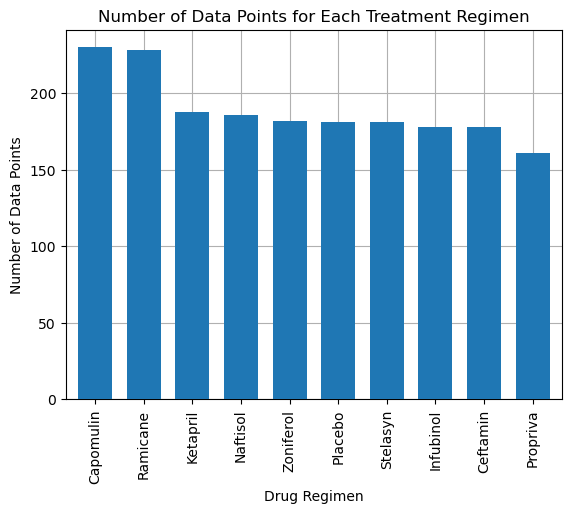

In [34]:
# Create a bar chart to display the distribution of data points for each treatment regimen using Pandas

# Plot a bar chart to show the number of data points for each treatment regimen using the value counts method.
bar_plot = data_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

# Assign labels to the axes of the plot
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Number of Data Points for Each Treatment Regimen")

# Add a grid to the plot, ensuring it appears behind the bars using the 'zorder' parameter.
bar_plot.grid(zorder=0)

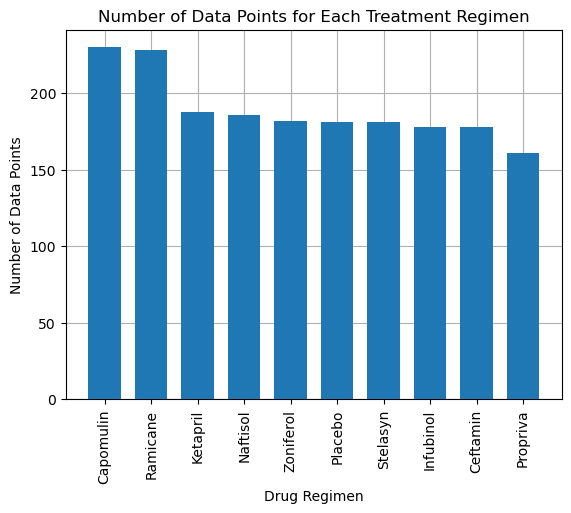

In [35]:
# Create a bar chart using pyplot to display the number of data points for each treatment regimen

# Find the count of data points for each drug regimen
counts = data_df['Drug Regimen'].value_counts()

# Assign the x-axis to the length of the 'counts' series
x_axis = np.arange(len(counts))


# Create a bar chart using the 'counts' series for both the x-axis and the corresponding y-values
plt.bar(x_axis, counts, width = 0.7, zorder=3)

# Assign labels to the tick marks based on the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks by 90 degrees to enhance visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

# Create a grid, placing it behind the bars using 'zorder' to ensure it's displayed correctly
plt.grid(zorder=0)

# Display the plot
plt.show()

Pie Charts 

Text(0, 0.5, '')

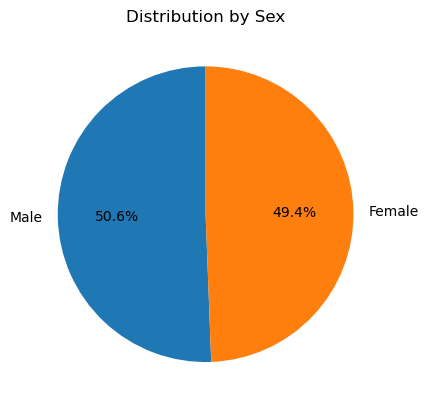

In [36]:
# Create a pie chart to display the distribution of female and male mice

# Determine the data distribution based on sex
data = data_df['Sex'].value_counts()

# Create a vertical pie chart with percentage values.
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')

# Remove the 'y' label from the pie chart
pie_plot.set_ylabel('')

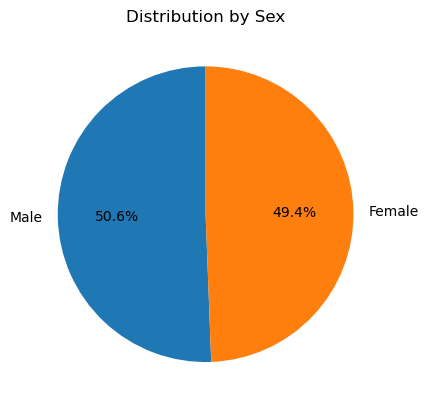

In [37]:
# Create a pie chart to display the distribution of female and male mice using pyplot

# Determine the data distribution based on sex
data = data_df['Sex'].value_counts()

# Instruct matplotlib to generate a pie chart with appropriate percentages and vertical display
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display the plot
plt.show()

Quartiles, Outliers, and Boxplots 

In [38]:
# Locate the maximum timepoint for each mouse

max_tp_df = pd.DataFrame(data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df

# Combine the maximum timepoint data with the main dataset (data_df).
merged_df = pd.merge(data_df, max_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [39]:
# Calculate the final tumor volume for each mouse in the top four treatment regimens and check for potential outliers using the IQR method

# Create a subset DataFrame containing data for the top four drug regimens
# Note that running previous cells is necessary for this to work

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Find each drug from the list 'drugs' in the original DataFrame
for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Create subset DataFrames containing only the rows with the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Create a series with the final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the IQR for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find the upper and lower bounds to identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers in each regimen
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


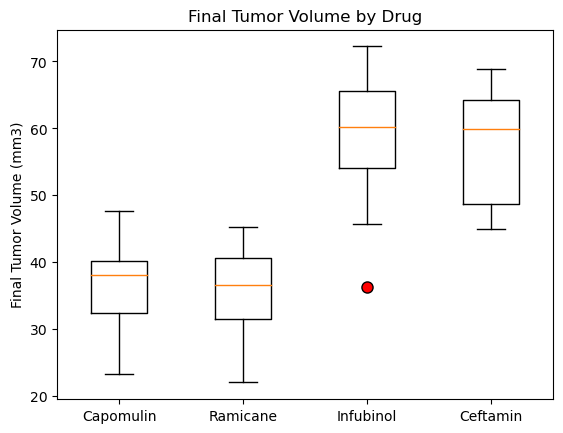

In [40]:
# Generate a box plot for the final tumor volume of each mouse in the four selected regimens

# Adjust the outliers on the box plot for better visibility
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot the boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Label the axes and add a title to the box plot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

Line Plot and Scatter Plots 

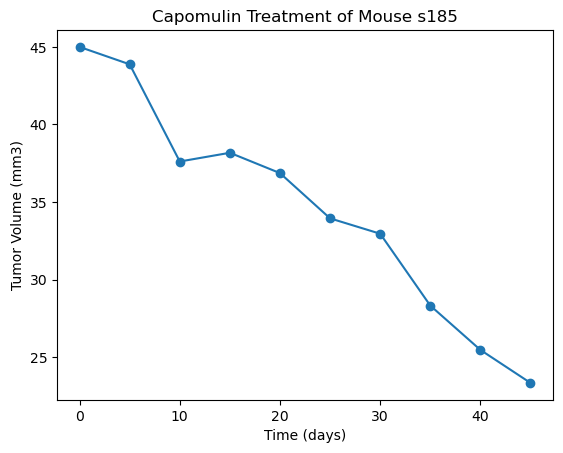

In [41]:
# Create a line plot showing the relationship between time points and tumor volume for a mouse treated with Capomulin

# Find the data points for a mouse treated with Capomulin
mouse = data_df.loc[data_df['Mouse ID'] == 's185']


# Create a line chart with time values on the x-axis and tumor volume values on the y-axis
# Add circles on each data point for better visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

# Label the x-axis and y-axis with appropriate descriptions and add a title to the plot for better understanding
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display the plot
plt.show()

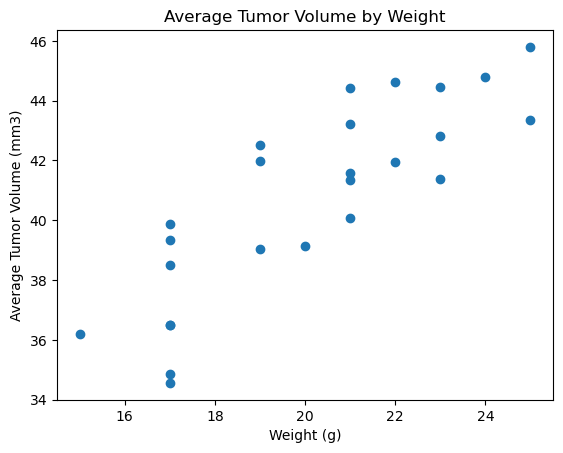

In [42]:
# Create a scatter plot with mouse weight on the x-axis and average tumor volume on the y-axis for the Capomulin regimen

# Filter the data to include only cases using the Capomulin regimen
capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Combine the average tumor volume data with the original dataframe and remove any duplicate entries
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Generate a scatter plot using circle markers and distinct colors based on the new dataframe
plt.scatter(x, y)

# Add appropriate labels and a title to the scatter plot for clarity
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

# Display the plot
plt.show()

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


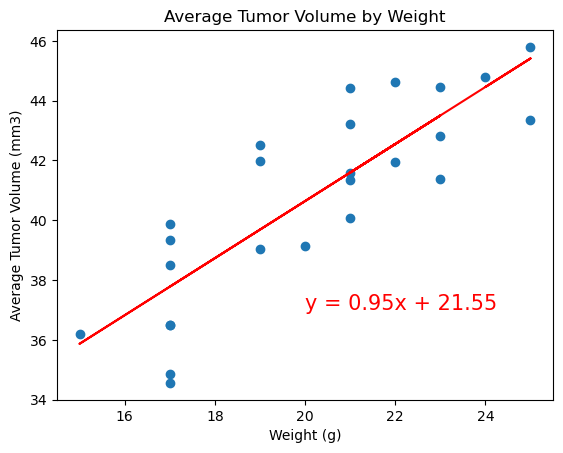

In [43]:
# Calculate the correlation coefficient and perform a linear regression analysis to examine the relationship between mouse weight and average tumor volume for the Capomulin regimen

capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Compute the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)

# Print the correlation between mouse weight and average tumor volume for the Capomulin regimen
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression on top of the scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Add the linear regression equation to the scatter plot
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Label the x and y axes and add a title to the plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()